In [749]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from itertools import groupby

In [750]:
df_gender= pd.read_csv('gender_submission.csv')
df_test= pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [751]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [752]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [753]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Variable | Type | Definition | Key |
| ----------- | ----------- | ----------- | ----------- |
| PassengerId | Nominal | ID Number of Customers | 
| Survived | Nominal | Warehouse where goods are being processed for deliveries  | 0 = No, 1 = Yes
| Pclass | Nominal | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
| Name | Nominal | Passenger Name |
| Sex | Nominal | Gender | 
| Age | Discrete | Age in years | 
| SibSp | Discrete | # of siblings / spouses aboard the Titanic | 
| Parch | Nominal | # of parents / children aboard the Titanic | 
| Ticket | Nominal | Ticket number| 
| Fare | Discrete | Passenger fare |
| Cabin | Nominal | Cabin number | 
| Embarked | Nominal | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

# Numerical Approach

In [754]:
#change column name
df_train.rename(columns={'Pclass':'Tickclass'}, inplace = True)
df_test.rename(columns={'Pclass':'Tickclass'}, inplace = True)

In [755]:
#change data type
df_train=df_train.astype({'PassengerId' : object, 'Survived': object, 'Tickclass': object})
df_test=df_test.astype({'PassengerId' : object, 'Tickclass': object})

In [756]:
num_dtypes=['int64','int32','int16','float64','float32','float16']
nums=df_train.select_dtypes(include=num_dtypes)
nums_col=nums.columns

cats = df_train.drop(columns =nums)
cats_plot=cats.drop(columns=['PassengerId','Name','Ticket', 'Cabin']).columns # Theese Data removed for easier visualization.
cats_col=cats.columns

In [757]:
nums.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [758]:
cats.describe()

,PassengerId,Survived,Tickclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,1,0,3,"Jermyn, Miss. Annie",male,CA. 2343,C23 C25 C27,S
freq,1,549,491,1,577,7,4,644


In [759]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [760]:
df_train.sample()

,PassengerId,Survived,Tickclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.25,NaN,S


# Box Plot

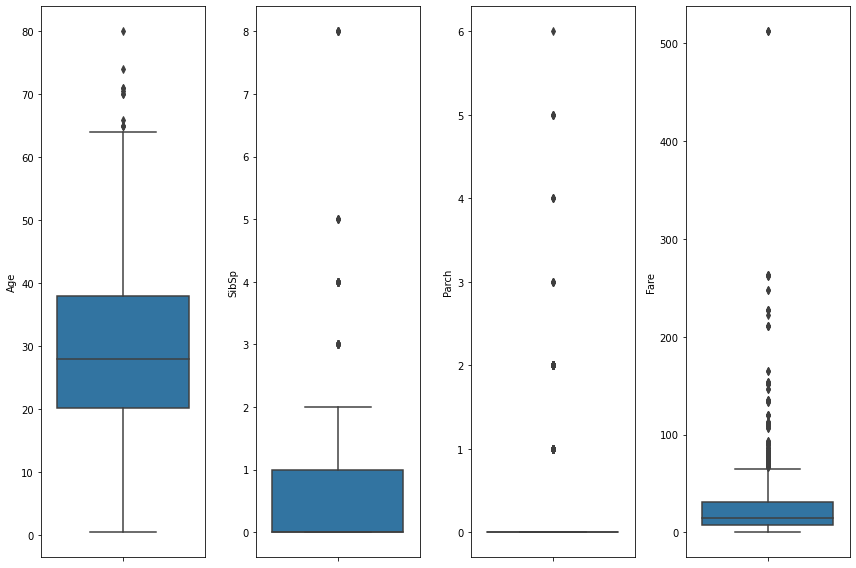

In [761]:
plt.figure(figsize= (12, 8))
for i in range(0, len(nums_col)): # for every value in nums
    plt.subplot(1, len(nums_col), i + 1) #row, columns, index
    sns.boxplot(y=df_train[nums_col[i]], orient ='v')
    plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

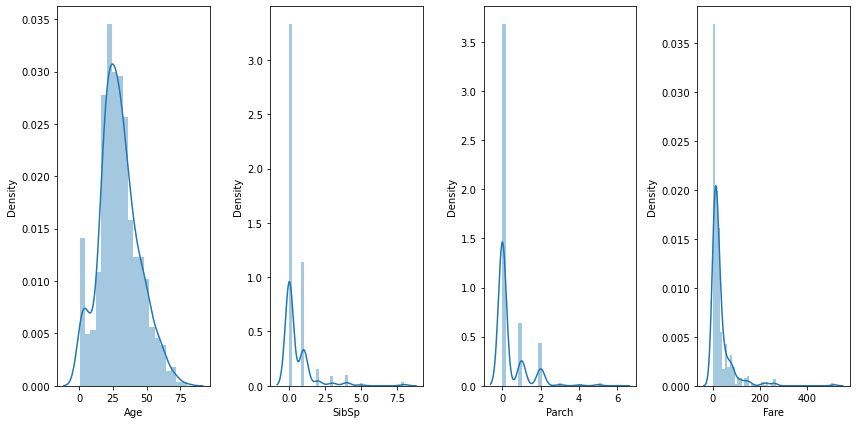

In [762]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums_col)):
    plt.subplot(1, len(nums_col),i + 1)
    sns.distplot(df_train[nums_col[i]])
    plt.tight_layout()

- Positively Skewed = SibSp, Parch, Fare
- Normal= Age

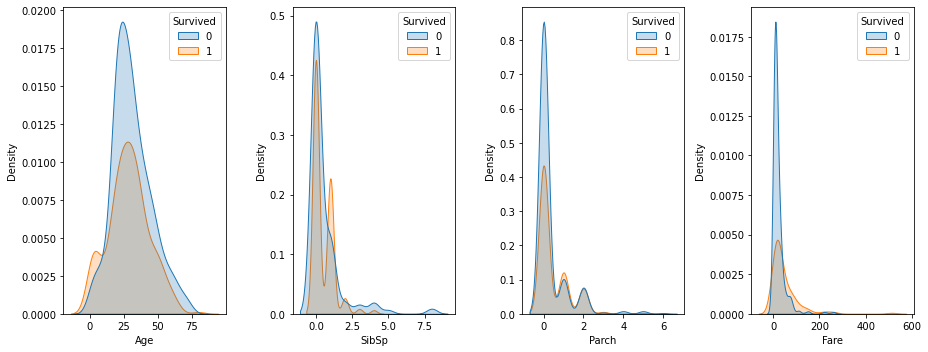

In [763]:
#Data Distribution View to the target
plt.figure(figsize=(13, 5))
for i in range(0, len(nums_col)):
    plt.subplot(1, len(nums_col), i+1)
    sns.kdeplot(data=df_train, x=df_train[nums_col[i]], hue='Survived', fill='True')
    plt.tight_layout()

<ipython-input-764-7cbdccda1a4f>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(nums_col)/2, i+1)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-764-7cbdccda1a4f>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(nums_col)/2, i+1)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and

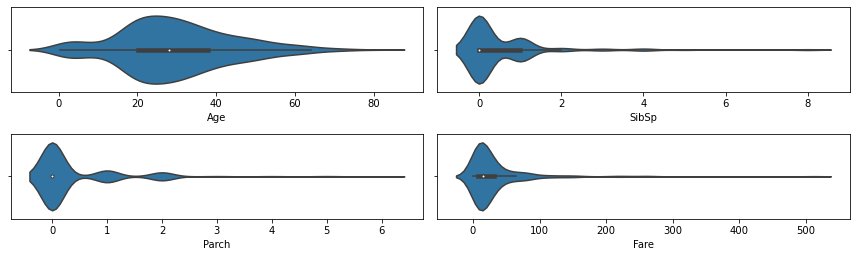

In [764]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums_col)):
    plt.subplot(3, len(nums_col)/2, i+1)
    sns.violinplot(df_train[nums_col[i]])
    plt.tight_layout()

## Count Plot

In [765]:
#create new cabin_class
df_cabin=df_train[['Cabin']].dropna()
Cabin_class=[]
for i in df_cabin.values:
    cabin_class = i[0][0]
    Cabin_class.append(cabin_class)

In [766]:
df_cabin['Cab_Class']=Cabin_class

In [767]:
df_cabin=df_cabin.drop(columns='Cabin')

In [768]:
df_train_new=df_train.merge(df_cabin, left_index= True, right_index= True, how ='outer')
df_train_new.head(5)

,PassengerId,Survived,Tickclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cab_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

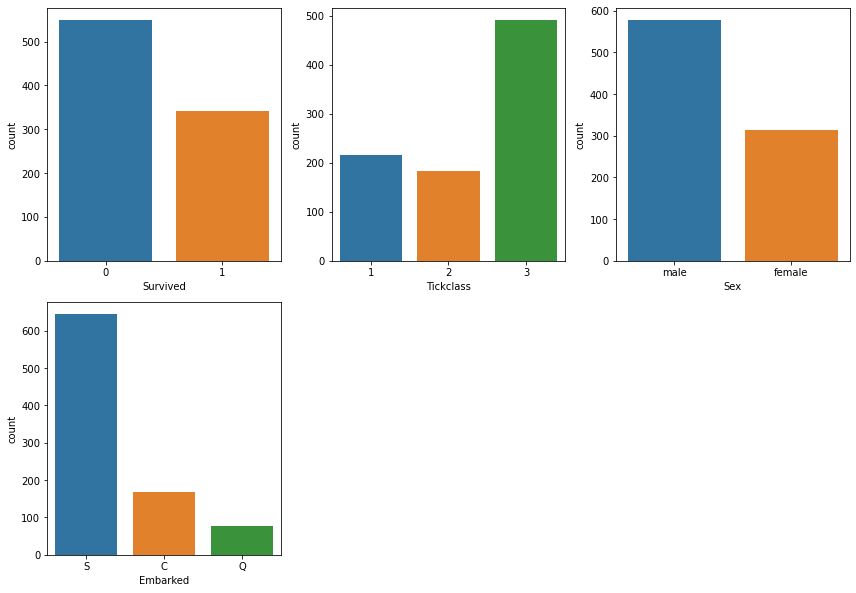

In [769]:
plt.figure(figsize=(12, 12))
for i in range(0, len(cats_plot)):
    plt.subplot(3, 3, i+1)
    sns.countplot(df_train[cats_plot[i]], orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Cab_Class', ylabel='count'>

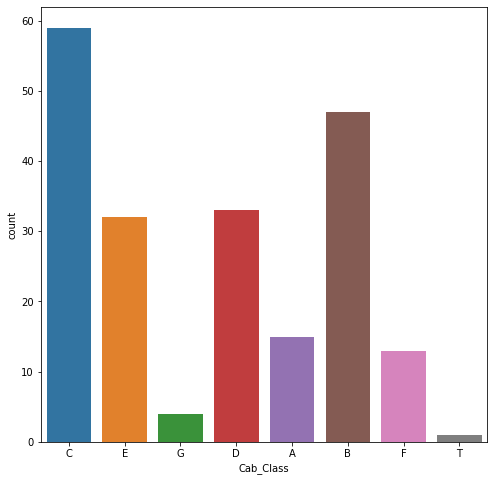

In [770]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df_train_new['Cab_Class'], data=df_train_new)

<AxesSubplot:xlabel='Survived', ylabel='count'>

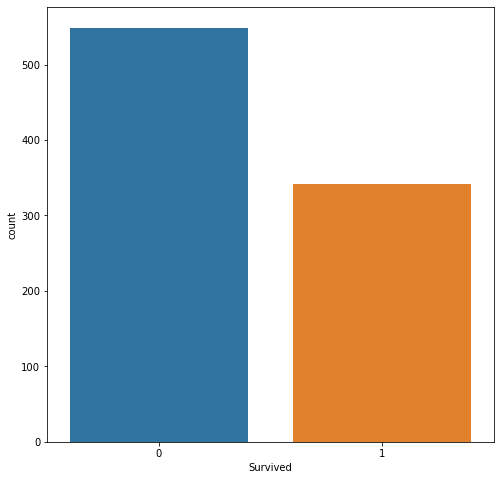

In [771]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df_train['Survived'], data=df_train)

## Multivariate Analysis

In [772]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Tickclass    891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [773]:
df_train.sample(10).head(10)

,PassengerId,Survived,Tickclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


group the cabin and fare

In [774]:
cats_plot

Index(['Survived', 'Tickclass', 'Sex', 'Embarked'], dtype='object')

In [775]:
nums_col

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [776]:
df_train.columns

Index(['PassengerId', 'Survived', 'Tickclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [777]:
number=np.arange(0,650,0+50)
number

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])

In [778]:
df_fare = df_train.groupby(['Fare', 'Survived']).agg({'PassengerId' : 'count' }).reset_index()
df_fare.columns = ['Fare', 'Survived', 'Count']
df_fare['Fare_price']=pd.cut(df_fare['Fare'], bins= number, labels= 
                              ['0-50','51-100','101-150','151-200','201-250',
                               '251-300','301-350','351-400','401-450','451-500','501-550','551-600'])
df_fare.head()

,Fare,Survived,Count,Fare_price
0,0.0000,0,14,NaN
1,0.0000,1,1,NaN
2,4.0125,0,1,0-50
3,5.0000,0,1,0-50
4,6.2375,0,1,0-50


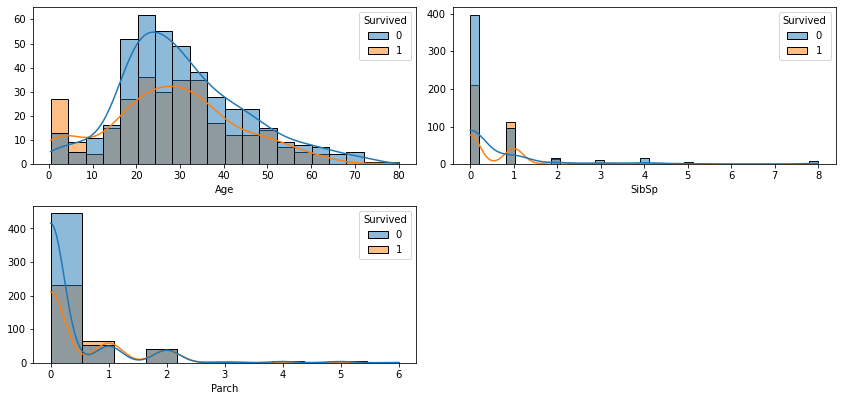

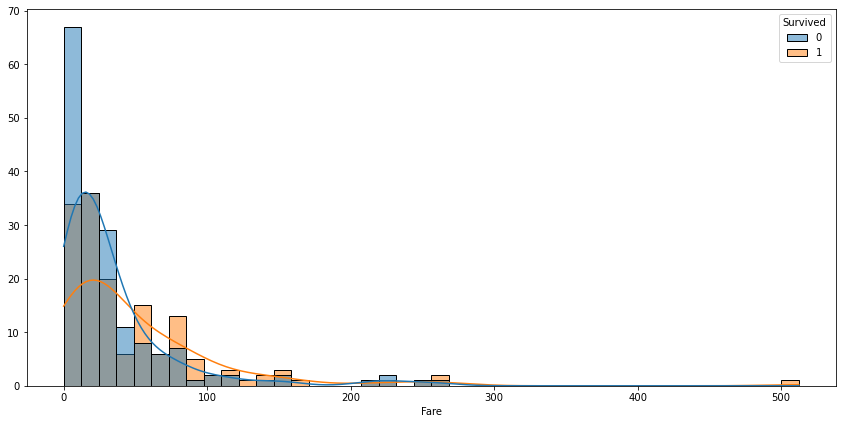

In [779]:
flag2 = ['Age', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 2, i+1)
    sns.histplot(data=df_train, x=df_train[flag2[i]], hue=df_train['Survived'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

    
plt.figure(figsize=(12, 6))   
plt.subplot(1, 1, 1)
sns.histplot(data=df_fare, x=df_fare['Fare'], hue=df_fare['Survived'], fill=True, kde='True')
plt.tight_layout()
plt.ylabel(None)
plt.show()

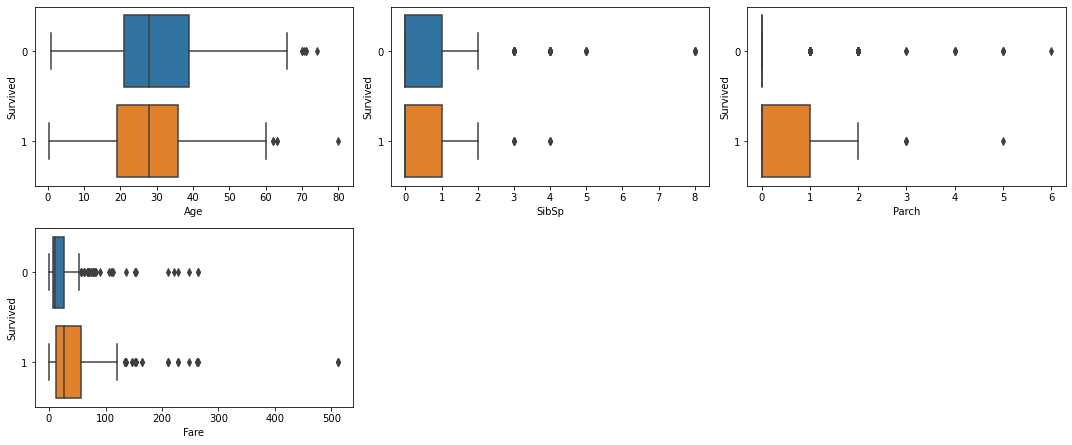

In [780]:
flag3 = ['Age', 'SibSp', 'Parch','Fare']
plt.figure(figsize=(15, 12))
for i in range(0, len(flag3)):
    plt.subplot(len(flag3), 3, i+1)
    sns.boxplot(data=df_train, x=df_train[flag3[i]], y=df_train['Survived'].astype(str))
    plt.tight_layout()

<AxesSubplot:>

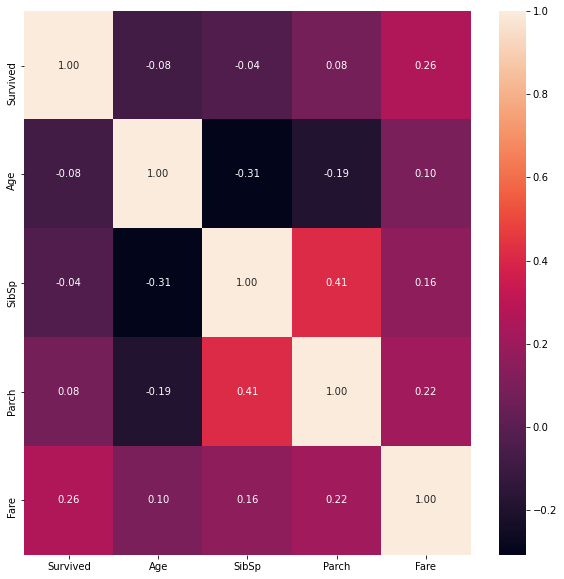

In [781]:
df_train_heat=df_train.astype({'PassengerId' : object, 'Survived': object, 'Tickclass': object,'Survived':int})

num_dtypes2=['int64','int32','int16','float64','float32','float16']
nums2=df_train_heat.select_dtypes(include=num_dtypes2)
nums2_col=nums2.columns

plt.figure(figsize=(10, 10))
sns.heatmap(df_train_heat.corr(), annot=True, fmt='.2f')

<Figure size 720x720 with 0 Axes>

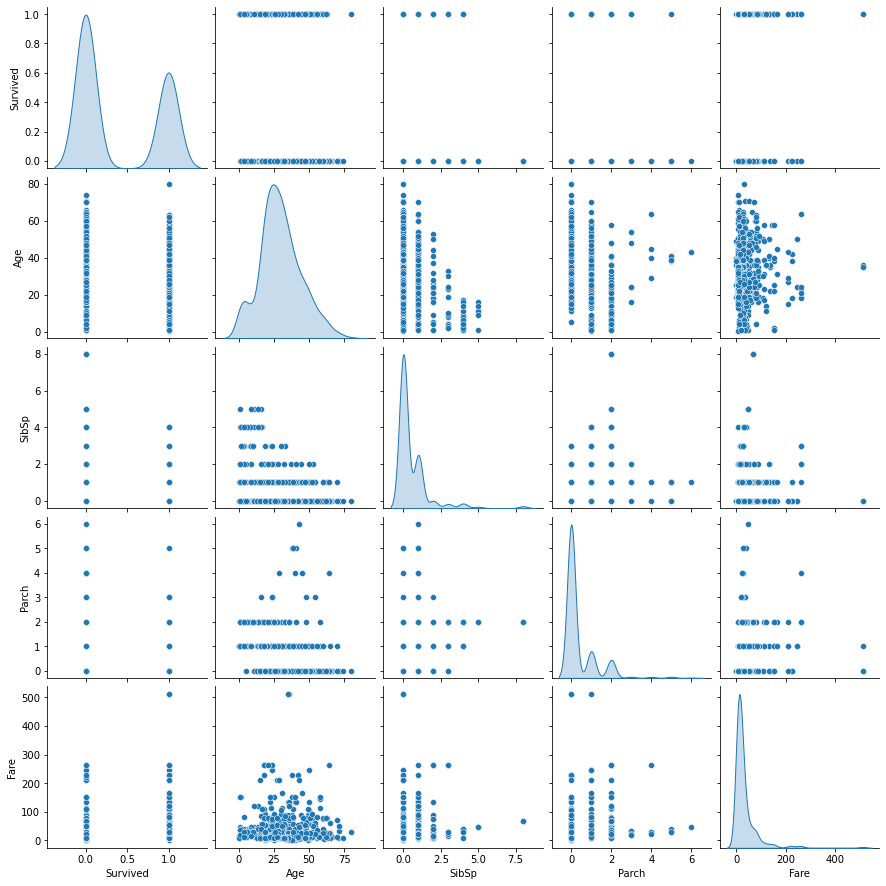

In [782]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_train_heat[nums2_col], diag_kind='kde')

In [783]:
cats_plot

Index(['Survived', 'Tickclass', 'Sex', 'Embarked'], dtype='object')

In [784]:
nums_col

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Figure size 864x576 with 0 Axes>

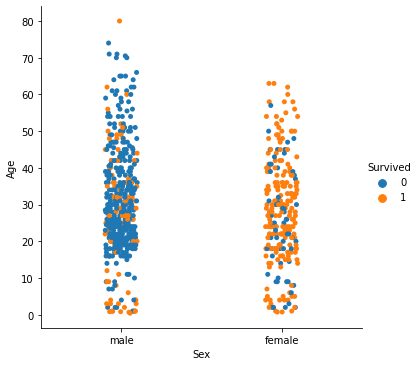

In [785]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Sex', y='Age', hue='Survived', data=df_train)

<Figure size 864x576 with 0 Axes>

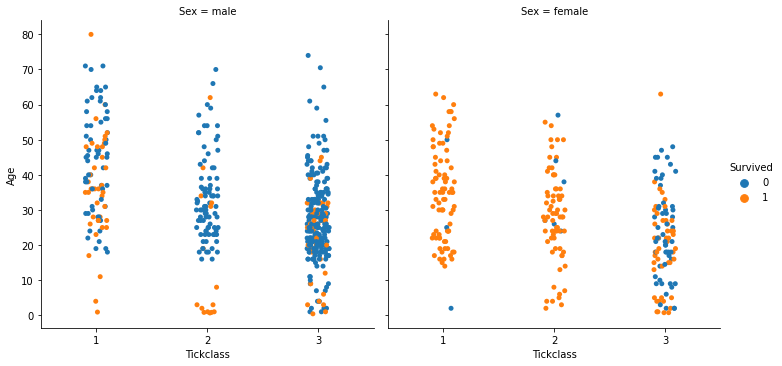

In [786]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Tickclass', y='Age', hue='Survived', col='Sex', data=df_train)

<Figure size 864x576 with 0 Axes>

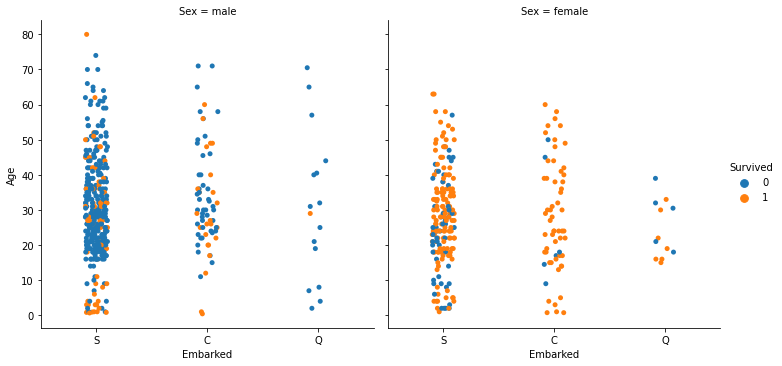

In [787]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Embarked', y='Age', hue='Survived', col='Sex', data=df_train)

<Figure size 864x576 with 0 Axes>

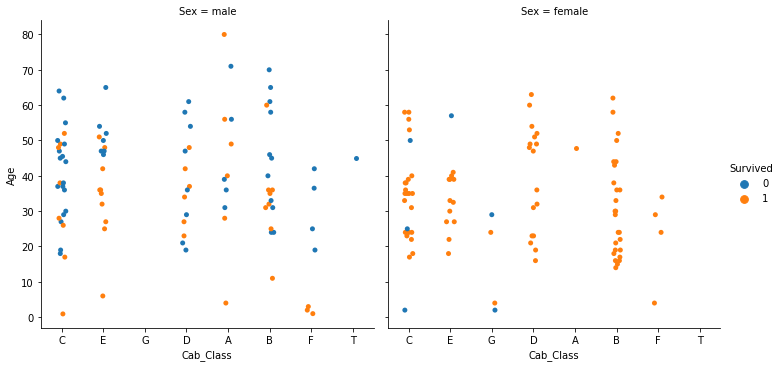

In [788]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Cab_Class', y='Age', hue='Survived', col='Sex', data=df_train_new)

# Data Pre-processing

## Checking Null Values

In [789]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Tickclass    891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [790]:
df_train.isna().sum()

PassengerId      0
Survived         0
Tickclass        0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [791]:
df_train=df_train.drop(columns=['Name','Ticket', 'Cabin']) 

# Name and Ticket was removed because it serves the same purpose as PassengerId
# Cabin was removed because there is too many null value on the features

In [792]:
df_train.isna().sum()

PassengerId      0
Survived         0
Tickclass        0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [793]:
df_train=df_train.dropna()

In [794]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    object 
 1   Survived     712 non-null    object 
 2   Tickclass    712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 55.6+ KB


## Checking Duplicate Values

In [795]:
df_train.duplicated().sum()

0

## Checking and removing Outliers

In [796]:
nums_col

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [797]:
#Check with Z-Score for Age because normally distributed

print(f'Number of rows before erasing outliers: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['Age']:
    zscore = abs(st.zscore(df_train[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Number of rows after erasing outliers: {len(df_train)}')

#no outliers based from Z-score

Number of rows before erasing outliers: 712
Number of rows after erasing outliers: 710


In [798]:
#check with IQR Limit for SibSp and Parch because positively skewed

# replace outlier outside 1,5 IQR

print(f'Number of rows before erasing outliers: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['SibSp', 'Parch']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Number of rows after erasing outliers: {len(df_train)}')

Number of rows before erasing outliers: 710
Number of rows after erasing outliers: 660


<AxesSubplot:xlabel='Fare', ylabel='Density'>

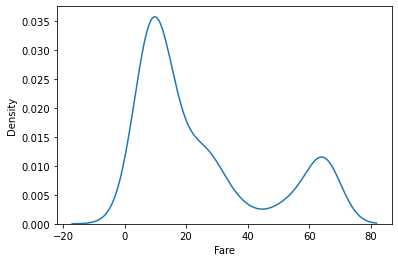

In [799]:
#Replace Fare Outliers with Max IQR, because too much data we erase if we use 1,5 IQR

Q1_fare = df_train['Fare'].quantile(0.25)
Q3_fare = df_train['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
low_limit_fare = Q1_fare - (IQR_fare * 1.5)
high_limit_fare = Q3_fare + (IQR_fare * 1.5)
df_train['Fare'].loc[df_train['Fare'] > high_limit_fare] = high_limit_fare

sns.kdeplot(x='Fare',data=df_train)

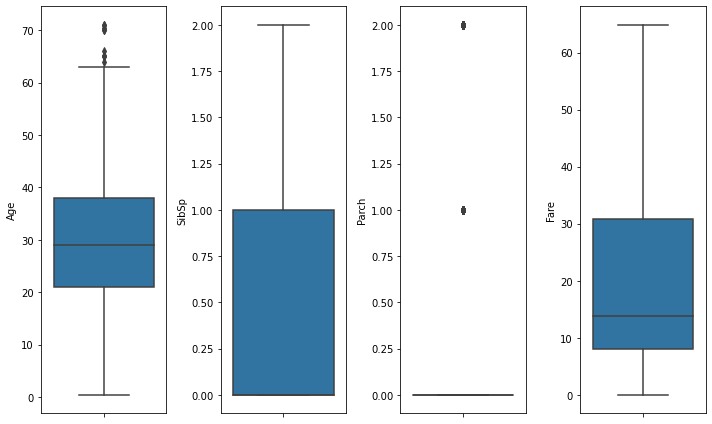

In [800]:
plt.figure(figsize= (10, 6))
for i in range(0, len(nums_col)): # for every value in nums
    plt.subplot(1, len(nums_col), i + 1) #row, columns, index
    sns.boxplot(y=df_train[nums_col[i]], orient ='v')
    plt.tight_layout()

In [801]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  660 non-null    object 
 1   Survived     660 non-null    object 
 2   Tickclass    660 non-null    object 
 3   Sex          660 non-null    object 
 4   Age          660 non-null    float64
 5   SibSp        660 non-null    int64  
 6   Parch        660 non-null    int64  
 7   Fare         660 non-null    float64
 8   Embarked     660 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 51.6+ KB


# Feature Encoding

In [802]:
df_train.columns

Index(['PassengerId', 'Survived', 'Tickclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [803]:
df_train

,PassengerId,Survived,Tickclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.250000,S
1,2,1,1,female,38.0,1,0,64.854625,C
2,3,1,3,female,26.0,0,0,7.925000,S
3,4,1,1,female,35.0,1,0,53.100000,S
4,5,0,3,male,35.0,0,0,8.050000,S
...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.050000,S
886,887,0,2,male,27.0,0,0,13.000000,S
887,888,1,1,female,19.0,0,0,30.000000,S
889,890,1,1,male,26.0,0,0,30.000000,C


In [804]:
#One Hot Encoding
fesex = pd.get_dummies(df_train['Sex'], prefix = 'Sex')
feembark = pd.get_dummies(df_train['Embarked'], prefix = 'Embarked')

#Concat One Hot Encoding
df_train = pd.concat([df_train, fesex], axis = 1)
df_train = pd.concat([df_train, feembark], axis = 1)

In [805]:
df_train=df_train.drop(columns=['Sex','Embarked'])

In [806]:
df_train

,PassengerId,Survived,Tickclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.250000,0,1,0,0,1
1,2,1,1,38.0,1,0,64.854625,1,0,1,0,0
2,3,1,3,26.0,0,0,7.925000,1,0,0,0,1
3,4,1,1,35.0,1,0,53.100000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.050000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,25.0,0,0,7.050000,0,1,0,0,1
886,887,0,2,27.0,0,0,13.000000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.000000,1,0,0,0,1
889,890,1,1,26.0,0,0,30.000000,0,1,1,0,0


In [807]:
#Import Metrics Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

#Model Evaluation function
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.3f' % accuracy_score(ytest, pred))
    print('Precision : %.3f' % precision_score(ytest, pred))
    print('Recall : %.3f' % recall_score(ytest, pred))
    print('F-1Score : %.3f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.3f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.3f'% average_precision)

In [745]:
#Feature Importance Function
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

#Best Hyperparameter Function
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [810]:
#change target data to int
df_train=df_train.astype({'PassengerId' : object, 'Survived': int, 'Tickclass': object})

In [811]:
#Splitting Feature & Target
X=df_train.drop(columns=['Survived'])
y=df_train['Survived']

In [812]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [813]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [818]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [819]:
model.predict_proba(X_test)

array([[0.02896693, 0.97103307],
       [0.82737484, 0.17262516],
       [0.17165353, 0.82834647],
       [0.68746977, 0.31253023],
       [0.7686786 , 0.2313214 ],
       [0.80522493, 0.19477507],
       [0.93433359, 0.06566641],
       [0.45936065, 0.54063935],
       [0.88362239, 0.11637761],
       [0.7608783 , 0.2391217 ],
       [0.093933  , 0.906067  ],
       [0.29402585, 0.70597415],
       [0.82236523, 0.17763477],
       [0.78929148, 0.21070852],
       [0.45139719, 0.54860281],
       [0.81075589, 0.18924411],
       [0.90909023, 0.09090977],
       [0.04757194, 0.95242806],
       [0.61742101, 0.38257899],
       [0.76470886, 0.23529114],
       [0.08847657, 0.91152343],
       [0.07225652, 0.92774348],
       [0.85141416, 0.14858584],
       [0.48343653, 0.51656347],
       [0.91527354, 0.08472646],
       [0.25233755, 0.74766245],
       [0.70900749, 0.29099251],
       [0.87618136, 0.12381864],
       [0.38029315, 0.61970685],
       [0.87157644, 0.12842356],
       [0.